# 음성 통화 데이터

### KQ
"서울에 배달 음식점을 열고자 한다면 어떤 종류의 음식점이 좋을까?"

- 문제 정의: 지역별로 사람들이 배달 주문을 많이 하는 음식점의 종류를 알고 싶다.
- 검증 방식: 음성 통화 데이터를 활용하여 지역별로 어떤 종류의 음식을 가장 많이 주문하는지 확인.

#### 활용 데이터

 칼럼명 | 의미 | 예시
- | - | -
일자(YYYYMMDD) | 통화 일자 | 20200921
연령 | 나이 | 50
성별 | 성별 | 여성
발신지(시도) | 음성통화 발신지(시도) | 강원
발신지(시군구) | 음성통화 발신지(시군구) | 강릉시
대분류 | 통화 업종 대분류 | 생활편의
중분류 | 통화 업종 중분류 | 생활서비스
통화비율(시군구내) | 급여 (단위 : €유로) | 0.0001

 *출처 : SKT Data Hub, 음성통화 이용데이터 - 20년 09월 
 https://www.bigdatahub.co.kr/product/view.do?pid=1002333*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import sys
import platform
import warnings

warnings.filterwarnings(action='ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 음성 통화 데이터 확인

In [4]:
# 음성 통화 데이터 열기
call_data = pd.read_csv('./data/call_data.csv')
call_data.shape

(561129, 8)

In [5]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561129 entries, 0 to 561128
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   일자(YYYYMMDD)  561129 non-null  int64  
 1   연령            561129 non-null  int64  
 2   성별            561129 non-null  object 
 3   발신지(시도)       561129 non-null  object 
 4   발신지(시군구)      561129 non-null  object 
 5   대분류           561129 non-null  object 
 6   중분류           561129 non-null  object 
 7   통화비율(시군구내)    561129 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 34.2+ MB


In [7]:
call_data.head(3)

,일자(YYYYMMDD),연령,성별,발신지(시도),발신지(시군구),대분류,중분류,통화비율(시군구내)
0,20200921,50,여성,강원,강릉시,생활편의,생활서비스,0.0001
1,20200927,60,남성,강원,강릉시,생활편의,생활편의,0.0001
2,20200927,40,여성,강원,강릉시,음식점,중식,0.0001


In [9]:
# 데이터 컬럼명 전처리
call_data = call_data.rename(columns={'발신지(시도)':'구역','발신지(시군구)':'지역'})

In [10]:
call_data['대분류'].unique()

array(['생활편의', '음식점', '서비스산업', '교통편의', '금융편의', '공공편의', '여행', '쇼핑', '의료편의',
       '스포츠/레저', '교육/학문', '기업/단체', '이벤트', '건물/시설'], dtype=object)

In [11]:
# 음식점 관련 데이터만 추출
food_call = call_data[call_data['대분류']=='음식점']
food_call.head(10)

,일자(YYYYMMDD),연령,성별,구역,지역,대분류,중분류,통화비율(시군구내)
2,20200927,40,여성,강원,강릉시,음식점,중식,0.0001
5,20200919,40,여성,강원,강릉시,음식점,중식,0.0002
7,20200916,20,남성,강원,강릉시,음식점,한식,0.0001
8,20200914,40,남성,강원,강릉시,음식점,치킨,0.0001
18,20200919,50,여성,강원,강릉시,음식점,한식,0.0003
26,20200912,40,여성,강원,강릉시,음식점,분식,0.0001
29,20200902,30,여성,강원,강릉시,음식점,한식,0.0003
35,20200902,40,남성,강원,강릉시,음식점,한식,0.0003
36,20200918,40,여성,강원,강릉시,음식점,중식,0.0001
37,20200920,50,여성,강원,강릉시,음식점,한식,0.0002


In [12]:
# 서울 구역만 추출
seoul = food_call[food_call['구역']=='서울']
seoul['지역'].unique()

array(['강북구', '강서구', '관악구', '광진구', '노원구', '동작구', '마포구', '서초구', '성북구',
       '영등포구', '용산구', '은평구', '종로구', '중구', '강남구', '강동구', '구로구', '금천구',
       '도봉구', '동대문구', '서대문구', '성동구', '송파구', '양천구', '중랑구'], dtype=object)

In [13]:
# 특정 지역을 입력받아 음식점 종류 확인
name = input("알아 보고싶은 지역명을 입력하세요.")

location = seoul[seoul['지역']==name]
location['중분류'].value_counts()

알아 보고싶은 지역명을 입력하세요.강북구


한식    168
치킨     51
중식     43
양식      1
Name: 중분류, dtype: int64

알아 보고싶은 지역명을 입력하세요.강남구


Text(0, 0.5, '주문 수')

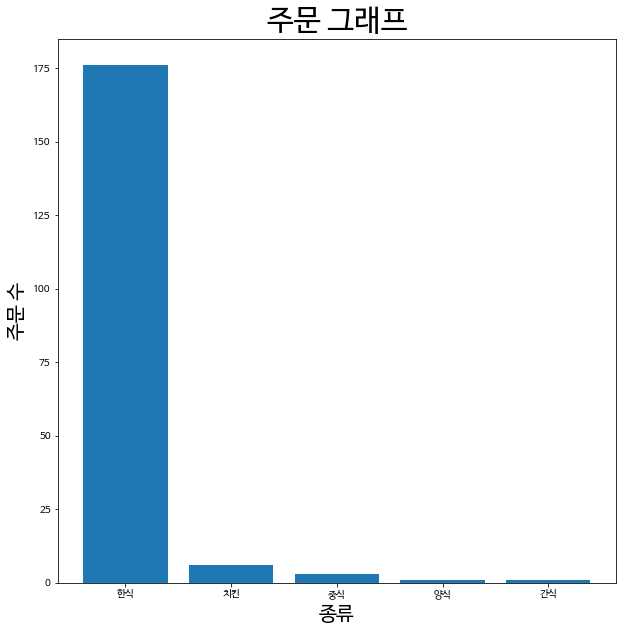

In [16]:
# 위 분석 내용 시각화하기
name = input("알아 보고싶은 지역명을 입력하세요.")
location = seoul[seoul['지역']==name]

food = location['중분류'].value_counts()

fig, axes = plt.subplots(figsize=(10,10))
axes.bar(food.index, food.values)
axes.set_title("주문 그래프", size=30)
axes.set_xlabel("종류", size=20)
axes.set_ylabel("주문 수", size=20)

## 데이터 분석 결과를 통해 도출한 결론

#### 데이터 분석 결과
 1. 서울 강남구를 기준으로 가장 많이 주문하는 음식은 한식
 2. 서울 강남구를 기준으로 한식, 치킨, 중식, 양식, 간식 순으로 주문수가 많음을 확인

#### 결론

 1. 데이터 분석 결과를 통해 서울 강남구의 한식의 주문량이 압도적으로 높음을 확인했으나 서울 강남구 이외에 타지역(수원, 수원시, 제주 제주시 등)도 마찬가지로 한식이 압도적으로 높았다.

 2. 이를 통해 음성 통화 데이터 내 한식 카테고리가 광범위하게 설정되어 있다고 추측.

 3. 데이터를 좀 더 세분화 할 수 있는 방법은 없을까 고민이 필요할 것 같다.